<a href="https://colab.research.google.com/github/Rdisrael/progs-and-AI/blob/main/Estudos_de_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AI exercise lists.**\
**Comment all lines of code for better explanation and review.**

# List 2 Introduction to ML


Exercise 1, class 6, tiny ML course for embedded systems

In [ ]:
import numpy as np
import tensorflow as tf
#DATASET
xs= np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys= np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)
#these are the database of inputs and outputs
print(xs)
print(ys)
#DNN Model
model= tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])
model.summary()
#by the summary you can check the model especifications
model.compile(optimizer='sgd', loss='mean_squared_error')
#training
history = model.fit(xs,ys,epochs=500)
#this function runs the ML algorithm base on the number of epochs
#testing
print(model.predict([10.0]))

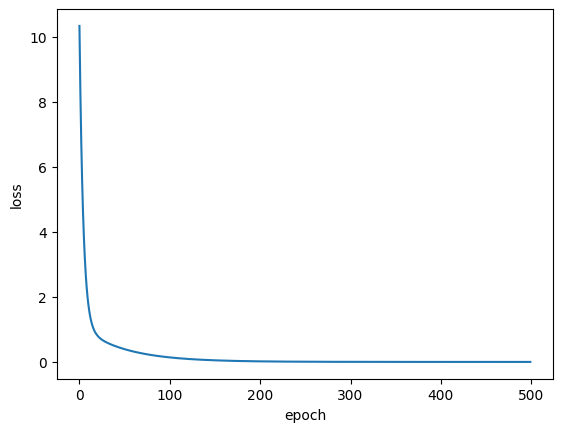

In [ ]:
import matplotlib.pyplot as plt
history.history.keys()
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
#exercise 2- two layers and 2 neurons
import numpy as np
import tensorflow as tf
#DATASET
xs= np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys= np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)
#these are the database of inputs and outputs
print(xs)
print(ys)
#DNN Model
my_layer1 = tf.keras.layers.Dense(units=2, input_shape=[1])
my_layer2 = tf.keras.layers.Dense(units=1)
model= tf.keras.Sequential([my_layer1, my_layer2])
#by the summary you can check the model especifications
model.compile(optimizer='sgd', loss='mean_squared_error')
#training
history1 = model.fit(xs,ys,epochs=500)
#this function runs the ML algorithm base on the number of epochs
#testing
print(model.predict([10.0]))

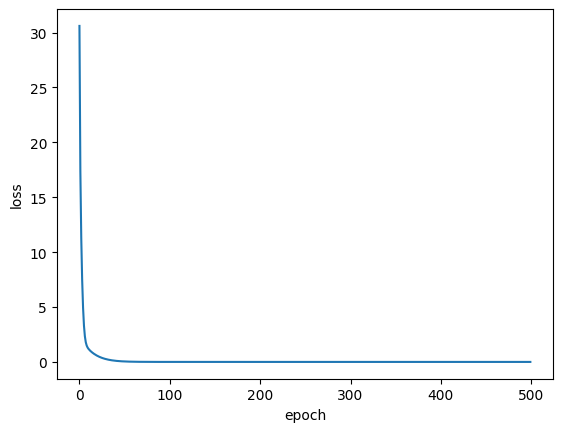

In [ ]:
import matplotlib.pyplot as plt
history1.history.keys()
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()



**-------------------------------------------------------------------------------------------------------------------------------------------------------------**



# List 3 Classification



exploring DNN learning with TF


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load in fashion MNIST
mnist = tf.keras.datasets.fashion_mnist #data set name, this dataset is a default of the TF library
(training_images, training_labels), (test_images, test_labels) = mnist.load_data() #setting up the labels of training images and testing images, these labels names are arbitrary

# Define the base model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
#the flatten input is a reshape of the original matrix to convert 28*28 square image in a 784 pixel matrix. 784 is the number of input neurons
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), #intermediate layer of neuros, relu apllies non-linearity into the model
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)]) #output layer correspondent to the number of outputs you want, in this case 10 is the number of clothes the you want to classify

Neural Networks learn the best when the data is scaled / normalized to fall in a constant range. One practitioners often use is the range [0,1]. How might you do this to the training and test images used here?

A hint: these images are saved in the standard RGB format

In [ ]:
#The RGB format is divided in 0 to 255 leves of collor
training_images  = training_images/255.0
test_images = test_images/255.0

In [ ]:
# compile the model
model.compile(optimizer = tf.keras.optimizers.Adam(), #Adam is the optimizer that makes the algorithm much more efficient when estimating the hit rate.
              loss = 'sparse_categorical_crossentropy', #For classification is used crossentropy to estimate the loss of the algorithm
              metrics=['accuracy'])

# fit the model to the training data
model.fit(training_images, training_labels, epochs=5) #here is the training of the algorithm, we only use five epochs because the dataset is very does not demmand to much effort.

# test the model on the test data
model.evaluate(test_images, test_labels) #test data from the dataset

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4708 - accuracy: 0.8319
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3582 - accuracy: 0.8684
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3225 - accuracy: 0.8808
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2984 - accuracy: 0.8892
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3430 - accuracy: 0.8747


[0.3430020213127136, 0.8747000098228455]

In [ ]:
#A hint: trying running print(test_labels[0])
print(test_labels[0])#print of the label "ankle boot" in the dataset
classifications = model.predict(test_images) #based on the test images classify all the test data
print(classifications[0])#here print the result of the cell 0
#when printing it shows the number 9 which corresponds to the "ankle boot", printing classifications[0] shows an array and the number closest to one is the ninth number

9
313/313 [==============================] - 1s 2ms/step
[2.7779930e-07 4.4390735e-08 1.9194226e-09 1.0564680e-08 6.9860775e-09
 1.0345438e-03 5.7469009e-08 3.9452888e-02 1.3644522e-07 9.5951200e-01]


313/313 [==============================] - 1s 4ms/step - loss: 0.3430 - accuracy: 0.8747
Testing data Accuracy: 87.5%
1
313/313 [==============================] - 2s 5ms/step
[1.23124515e-08 9.99999344e-01 1.46992374e-09 6.34050707e-07
 2.72084044e-09 6.73854044e-16 7.41476491e-10 1.75367124e-19
 1.70130544e-12 3.91178721e-14]


1

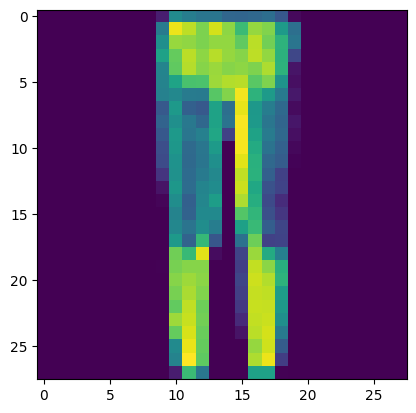

In [ ]:
#test for the hit of the algorith, insert any label of image and see if  the results are ok
test_eval = model.evaluate(test_images, test_labels)
print ("Testing data Accuracy: {:.1f}%".format(test_eval[1]*100))
plt.imshow(test_images[3]);
print(test_labels[3])
classifications = model.predict(test_images)
print(classifications[3])
# Returns the indices of the maximum values along an axis.
np.argmax(classifications[3])


Let's now look at the layers in your model. What happens if you double the number of neurons in the dense layer. What different results do you get for loss, training time etc? Why do you think that's the case?



In [ ]:
NUMBER_OF_NEURONS = 512*2#here i am setting up the number of neuros in the intermediate layer

# define the new model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(NUMBER_OF_NEURONS, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# compile fit and evaluate the model again
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)


Epoch 1/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4684 - accuracy: 0.8305
Epoch 2/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3554 - accuracy: 0.8707
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3230 - accuracy: 0.8816
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2961 - accuracy: 0.8910
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 0.3365 - accuracy: 0.8807


[0.3365391790866852, 0.8806999921798706]

Consider the effects of additional layers in the network instead of simply more neurons to the same layer. First update the model to add an additional dense layer into the model between the two existing Dense layers.

In [ ]:
YOUR_NEW_LAYER = tf.keras.layers.Dense(512, activation=tf.nn.relu) #add a new layer of neuros i just coppied the dense layer

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    YOUR_NEW_LAYER,
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])




Lets then compile, fit, and evaluate our model. What happens to the error? How does this compare to the original model and the model with double the number of neurons?




In [ ]:
# compile fit and evaluate the model again
model.compile(optimizer = tf.keras.optimizers.Adam(), #running the code again with another layer added
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 24s 12ms/step - loss: 0.4693 - accuracy: 0.8291
Epoch 2/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3550 - accuracy: 0.8689
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3212 - accuracy: 0.8812
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2953 - accuracy: 0.8906
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.3288 - accuracy: 0.8824


[0.3288225829601288, 0.8823999762535095]

Before you trained, you normalized the data. What would be the impact of removing that? To see it for yourself fill in the following lines of code to get a non-normalized set of data and then re-fit and evaluate the model using this data.



In [ ]:
# get new non-normalized mnist data
training_images_non = training_images
test_images_non = test_images

# re-compile, re-fit and re-evaluate
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    YOUR_NEW_LAYER,
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images_non, training_labels, epochs=5)
model.evaluate(test_images_non, test_labels)
classifications = model.predict(test_images_non)

Epoch 1/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4694 - accuracy: 0.8291
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3560 - accuracy: 0.8704
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3193 - accuracy: 0.8824
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2948 - accuracy: 0.8899
Epoch 5/5
313/313 [==============================] - 1s 3ms/step


Conclusion \
Definely the classification algorithm works. Adding layers and neurons to the program helps with the accuracy. \
First Algorithm: loss=0.3430 and accuracy= 0.8747 \
With additional neurons: loss=0.3365 and accuracy=0.8807 \
with additional layers: loss=0.3288 and accuracy=0.8824 \
Non-normalized data: loss=0.3614 and accuracy=0.8703

# List 4 CNN

**Exploring CNN learning with TensorFlow**\
Once you run the model at leat once without errors, try change the given hyperparameters, as number of filters, layers and neurons (units). Comment your obsevations.


4422102/4422102 [==============================] - 0s 0us/step


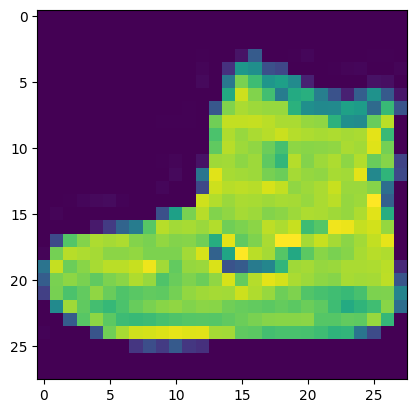

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
# Load in fashion MNIST
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train.shape
plt.imshow(x_train[0]);


In [2]:
y_train #array of values of training data
y_test #array of values of testing data

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [4]:
from tensorflow.keras.utils import to_categorical #converts numbers to a matrix
y_train.shape #number of data that can be used for training
y_cat_test = to_categorical(y_test,10)
y_cat_test.shape #number of separate data for testing
y_cat_train = to_categorical(y_train,10)
y_cat_train.shape #number of separate data for training
# verifing one sample label
print(y_train[1])
print(y_cat_train[1])



0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


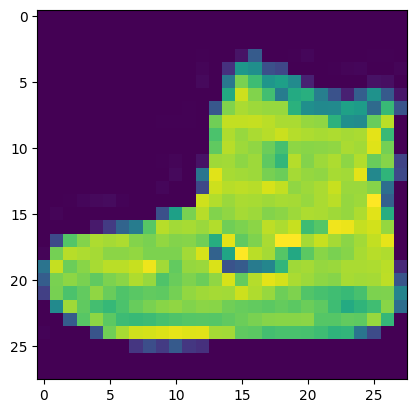

In [5]:
#processing the data and normalizing it
x_train.max()
x_train.min()
VALUE = 255.0
x_train = x_train/VALUE
x_test = x_test/VALUE
plt.imshow(x_train[0]);

Reshaping the Data

In [6]:
x_train.shape
x_test.shape
x_train = x_train.reshape(60000, 28, 28, 1)
# batch_size, widht, height, color_channels
x_train.shape
x_test = x_test.reshape(10000,28,28,1)
x_test.shape


(10000, 28, 28, 1)

Create Model Arquitecture and Compile


In [7]:
from tensorflow.keras.models import Sequential #provides training and inference features on this model.
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
LAYER_ACTIVATION = 'relu' #inserts non-linearity into the model
LAST_LAYER_ACTIVATION = 'softmax'
OUTPUT_LAYER_NEURONS = 10 #

LOSS = 'categorical_crossentropy'#If you use one-hot encoding, opt for categorical_crossentropy; if your labels are integers, use sparse_categorical_crossentropy
OPT = 'adam' #optimizer
model = Sequential()
model.add(
    Conv2D(
        filters=32, #number of cnn filters
        kernel_size=(4, 4), #kernel is the convolution matrix
        input_shape=(28, 28, 1),
        activation=LAYER_ACTIVATION,
    ))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=LAYER_ACTIVATION))
model.add(Dense(OUTPUT_LAYER_NEURONS, activation=LAST_LAYER_ACTIVATION))
model.summary()
model.compile(loss=LOSS,
              optimizer=OPT,
              metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

Train the Model\
Let's add a callback, "EarlyStopping". This one of the techinics to prevent overfitting.

In [8]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)
EPOCHS = 10
VAL_SPLIT = 0.1
history = model.fit(x_train,
                    y_cat_train,
                    epochs=EPOCHS,
                    validation_split=VAL_SPLIT,
                    callbacks=[early_stop])


Epoch 1/10
1688/1688 [==============================] - 42s 24ms/step - loss: 0.4139 - accuracy: 0.8545 - val_loss: 0.3177 - val_accuracy: 0.8852
Epoch 2/10
1688/1688 [==============================] - 42s 25ms/step - loss: 0.2841 - accuracy: 0.8978 - val_loss: 0.2760 - val_accuracy: 0.8997
Epoch 3/10
1688/1688 [==============================] - 39s 23ms/step - loss: 0.2389 - accuracy: 0.9121 - val_loss: 0.2729 - val_accuracy: 0.9007
Epoch 4/10
1688/1688 [==============================] - 38s 22ms/step - loss: 0.2035 - accuracy: 0.9243 - val_loss: 0.2625 - val_accuracy: 0.9027
Epoch 5/10
1688/1688 [==============================] - 39s 23ms/step - loss: 0.1772 - accuracy: 0.9343 - val_loss: 0.2500 - val_accuracy: 0.9148
Epoch 6/10
1688/1688 [==============================] - 39s 23ms/step - loss: 0.1545 - accuracy: 0.9433 - val_loss: 0.2561 - val_accuracy: 0.9097
Epoch 7/10
1688/1688 [==============================] - 39s 23ms/step - loss: 0.1323 - accuracy: 0.9514 - val_loss: 0.2762 -

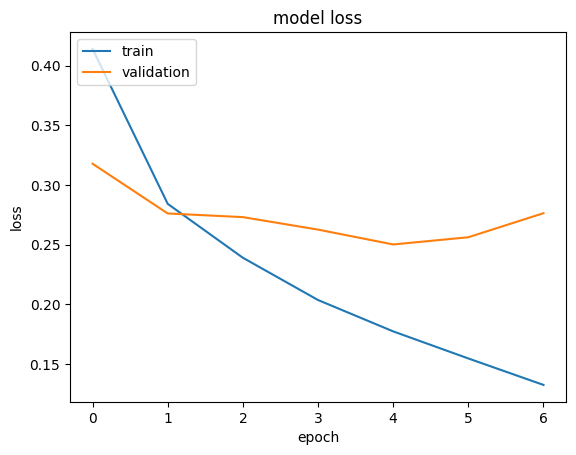

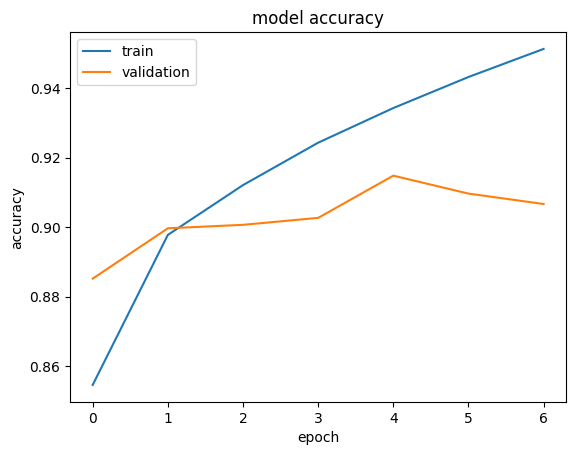

In [9]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Evaluate the Model


['loss', 'accuracy']
[0.28456228971481323, 0.9054999947547913]
313/313 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1000
           1       0.98      0.99      0.98      1000
           2       0.91      0.76      0.83      1000
           3       0.91      0.93      0.91      1000
           4       0.80      0.90      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.72      0.77      0.74      1000
           7       0.95      0.97      0.96      1000
           8       0.97      0.99      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



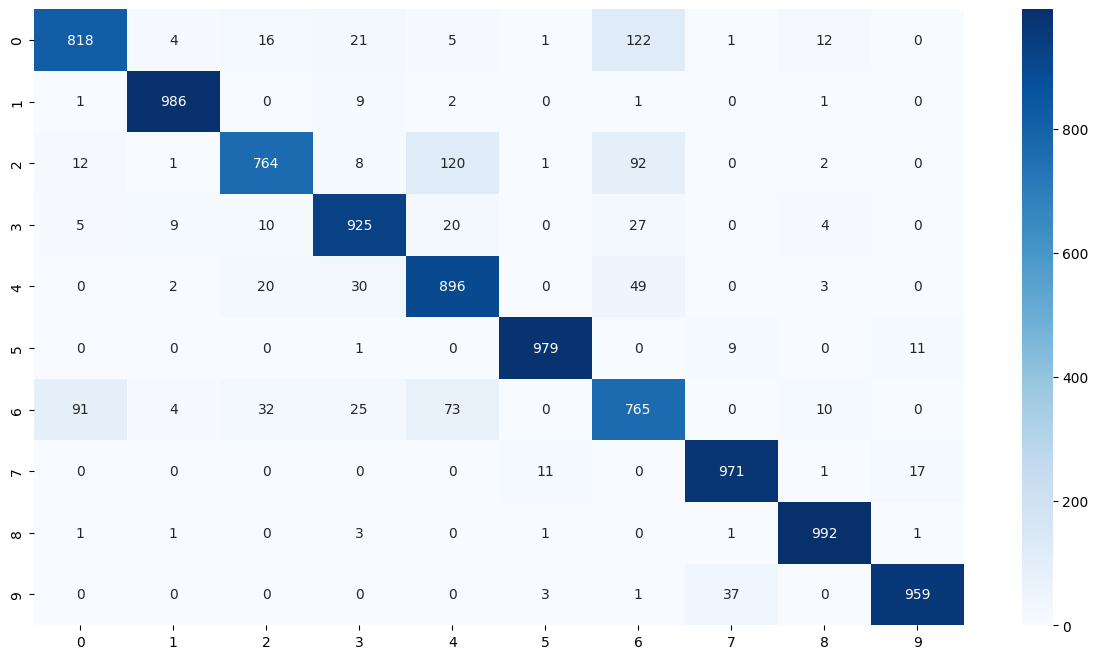

In [10]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))


from sklearn.metrics import classification_report,confusion_matrix


predictions = np.argmax(model.predict(x_test), axis=-1)
predictions.shape


y_cat_test.shape


y_cat_test[0]


predictions[0]


y_test


print(classification_report(y_test,predictions))
confusion_matrix(y_test,predictions)


import seaborn as sns


plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix(y_test,predictions), cmap='Blues', annot=True, fmt='g');

1875/1875 [==============================] - 14s 7ms/step
[9.9997073e-01 1.1156593e-10 6.0430243e-06 6.9166650e-09 9.2915946e-11
 1.7716413e-11 2.3179113e-05 6.4068076e-13 1.5173133e-09 1.1090130e-09]


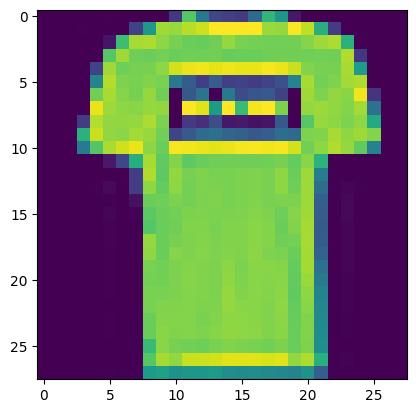

In [16]:
plt.imshow(x_train[1]);
classifications = model.predict(x_train) #based on the test images classify all the test data
print(classifications[1])#here print the result of the cell 0

#Bean Disease Classifier


For this assignment you'll take what you've learned so far and build a classifier for bean disease. You'll be provided with training and validation data based on 224x224 pixel color images taken of bean plants in Uganda. These images show healthy bean leaves as well as 2 types of common disease: bean rust and angular leaf spots. Your job will be to build a neural network that can tell the difference between the healthy and diseased leaves.

In [1]:
# Do not change this code
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
# Do not change this code
!wget --no-check-certificate \
    https://storage.googleapis.com/ibeans/train.zip \
    -O /tmp/train.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/ibeans/validation.zip \
    -O /tmp/validation.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/ibeans/test.zip \
    -O /tmp/test.zip
# Do not change this code
import os
import zipfile

local_zip = '/tmp/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/validation.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/test')
zip_ref.close()

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
--2024-01-04 21:25:24--  https://storage.googleapis.com/ibeans/train.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.145.207, 209.85.146.207, 209.85.147.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.145.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143812152 (137M) [application/zip]
Saving to: ‘/tmp/train.zip’

/tmp/train.zip      100%[===================>] 137.15M  64.4MB/s    in 2.1s    

2024-01-04 21:25:27 (64.4 MB/s) - ‘/tmp/train.zip’ saved [143812152/143812152]

--2024-01-04 21:25:27--  https://storage.googleapis.com/ibeans/validation.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.145.207, 209.85.146.207, 209.85.147.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.145.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18504213 (18M) [applicati

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator #the generator rescales the image

train_datagen = ImageDataGenerator( #rescale of the training image, these images are RGB format so 1/255
      rescale=1/255
)

validation_datagen = ImageDataGenerator(
      rescale=1/255
)

TRAIN_DIRECTORY_LOCATION = '/tmp/train' #do not use zip files here
VAL_DIRECTORY_LOCATION ='/tmp/validation'
TARGET_SIZE = (500,500) #number of pixels
CLASS_MODE = 'categorical' #

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIRECTORY_LOCATION,
    target_size = TARGET_SIZE,
    batch_size = 64,
    class_mode = CLASS_MODE
)

validation_generator = validation_datagen.flow_from_directory(
    VAL_DIRECTORY_LOCATION,
    target_size = TARGET_SIZE,
    batch_size = 64,
    class_mode = CLASS_MODE
)

Found 1034 images belonging to 3 classes.
Found 133 images belonging to 3 classes.


Model

In [4]:
model = tf.keras.Sequential([ # here i will use the data values of CNN cifar 10
   tf.keras.layers.InputLayer((500,500,3)),
   tf.keras.layers.experimental.preprocessing.Resizing(125,125),
   tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(),#max pooling reduces the image size
   tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(),
   tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(),
   tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(),
   tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(),
   tf.keras.layers.Flatten(),#flatten to linearize
   tf.keras.layers.Dense(265, activation='relu'),
   tf.keras.layers.Dense(128, activation='relu'),
   tf.keras.layers.Dense(3, activation='softmax'), #3 is the output number that you want
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 125, 125, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 123, 123, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 61, 61, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 59, 59, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 27, 27, 128)       7

In [5]:
LOSS_FUNCTION = 'sparse_categorical_crossentropy'
OPTIMIZER = 'adam'

model.compile(
    loss = LOSS_FUNCTION,
    optimizer = OPTIMIZER,
    metrics = ['accuracy']
)

In [7]:
NUM_EPOCHS = 20

history = model.fit(
      train_generator,
      epochs = NUM_EPOCHS,
      verbose = 1,
      validation_data = validation_generator)

Epoch 1/20


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
      ColabKernelApp.launch_instance()
    File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
      handle._run()
    File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback
      ret = callback()
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner
      self.ctx_run(self.run)
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run
      yielded = self.gen.send(value)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request
      self.do_execute(
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell
      result = self._run_cell(
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell
      return runner(coro)
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-6-bce2e5918218>", line 3, in <cell line: 3>
      history = model.fit(
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1051, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1109, in compute_loss
      return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/losses.py", line 2078, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/backend.py", line 5660, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [64,3] and labels shape [192]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_2109]